revenue vs profit analysis

importing lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


load cleaned dataset

In [3]:
df = pd.read_csv("profit_leakage_cleaned.csv")
df.head()


,order_id,order_date,customer_id,customer_type,region,sales_channel,product_id,product_category,unit_cost,unit_price,...,refund_amount,inventory_level,reorder_level,holding_cost,payment_delay_days,outstanding_amount,supplier_delay_days,logistics_cost,operational_cost,profit_margin_percent
0,1,2022-01-01 00:00:00,16795,Retail,North,Distributor,435,Automobile,4829.88,888.93,...,0.0,483,189,33.15,18,0.000000,24,659.09,78.99,-455.20
1,2,2022-01-01 00:01:00,1860,Corporate,North,Distributor,235,Pharma,3173.46,4089.16,...,0.0,11,182,208.42,10,0.000000,29,871.93,278.40,-0.05
2,3,2022-01-01 00:02:00,39158,Wholesale,East,Online,729,Electronics,3498.54,3923.52,...,0.0,260,183,346.40,69,71721.553248,11,946.05,1743.35,7.04
3,4,2022-01-01 00:03:00,45732,Retail,South,Distributor,1939,Furniture,628.06,851.16,...,0.0,202,53,43.85,41,4085.993580,17,833.95,716.21,22.22
4,5,2022-01-01 00:04:00,12284,Retail,North,Online,1670,Pharma,1257.04,3229.26,...,0.0,152,185,19.90,21,0.000000,25,540.11,1732.09,32.47


select key financial columns

In [4]:
financial_cols = [
    "revenue",
    "cost",
    "profit",
    "discount_amount",
    "net_revenue"
]


normalization

In [5]:
df_norm = df.copy()

for col in financial_cols:
    df_norm[col + "_norm"] = (
        df[col] - df[col].min()
    ) / (
        df[col].max() - df[col].min()
    )


revenue vs profit

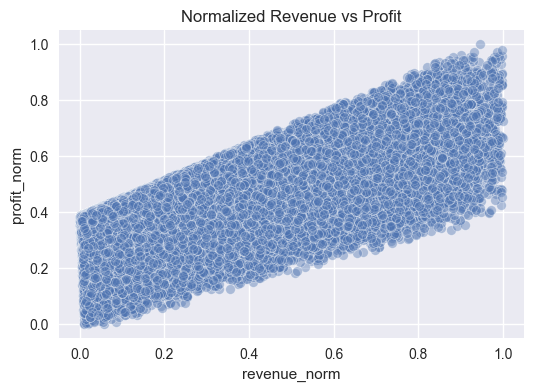

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="revenue_norm",
    y="profit_norm",
    data=df_norm,
    alpha=0.4
)
plt.title("Normalized Revenue vs Profit")
plt.show()


low profit margin analysis

In [7]:
df["profit_margin_percent"].describe()


count    100000.000000
mean        -65.841639
std         327.480790
min       -5903.380000
25%         -43.990000
50%          16.510000
75%          48.030000
max          99.080000
Name: profit_margin_percent, dtype: float64

In [8]:
#identify low margin orders
low_margin_df = df[df["profit_margin_percent"] < 5]
low_margin_df.shape


(42417, 28)

category-wise profit margin

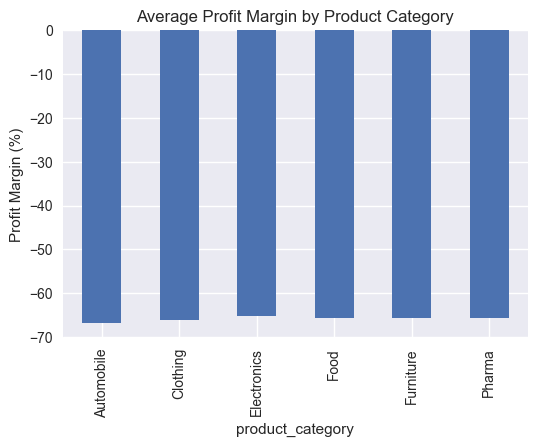

In [9]:
plt.figure(figsize=(6,4))
df.groupby("product_category")["profit_margin_percent"].mean().plot(kind="bar")
plt.title("Average Profit Margin by Product Category")
plt.ylabel("Profit Margin (%)")
plt.show()


region wise revenue vs profit

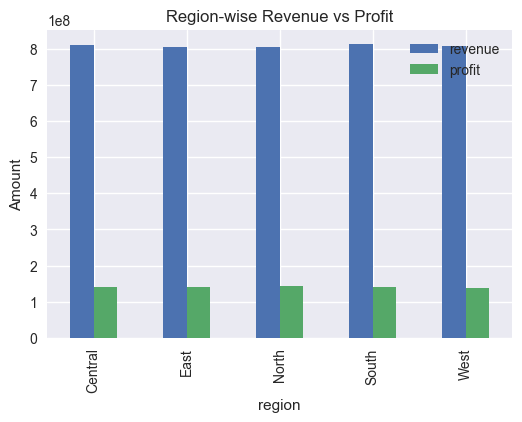

In [10]:
region_summary = df.groupby("region")[["revenue", "profit"]].sum()

region_summary.plot(kind="bar", figsize=(6,4))
plt.title("Region-wise Revenue vs Profit")
plt.ylabel("Amount")
plt.show()
